In [2]:
'''log ----- 22nd May 2020.....'''

try:
    import pyNN.spiNNaker as sim
except Exception as e:
    import synnaker8 as sim
from pyNN.utility.plotting import Figure, Panel
import matplotlib.pyplot as plt
import pyNN.utility.plotting as plot
import random
import numpy as np
from pyNN.random import RandomDistribution, NumpyRNG

Detected PyNN version 0.9.4 and Neo version 0.6.1


2020-05-23 14:24:12 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2020-05-23 14:24:12 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries
2020-05-23 14:24:12 WARNING: /home/jovyan/01.RunningPyNNSimulations/AdityaK-PaarthD/reports has 4 old reports that have not been closed
2020-05-23 14:24:12 WARNING: /home/jovyan/01.RunningPyNNSimulations/AdityaK-PaarthD/application_generated_data_files has 4 old reports that have not been closed
2020-05-23 14:24:12 WARNING: A timestep was entered that has forced sPyNNaker to automatically slow the simulation down from real time by a factor of 10. To remove this automatic behaviour, please enter a timescaleFactor value in your .spynnaker.

['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


2020-05-23 14:24:16 INFO: Time 0:00:03.946048 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2020-05-23 14:24:26 INFO: Time 0:00:10.189277 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2020-05-23 14:24:33 INFO: Time 0:00:07.022285 taken by PartitionAndPlacePartitioner
Created spalloc job 5364429
2020-05-23 14:24:33 INFO: Created spalloc job 5364429
Waiting for board power commands to complete.
2020-05-23 14:24:33 INFO: Waiting for board power commands to complete.
2020-05-23 14:24:38 INFO: Time 0:00:05.054436 taken by SpallocAllocator
2020-05-23 14:24:38 INFO: Creating transceiver for 10.11.200.17
2020-05-23 14:24:38 INFO: Working out if machine is booted
2020-05-23 14:24:42 INFO: Attempting to

2020-05-23 14:24:53 INFO: Time 0:00:00.191905 taken by HostExecuteSystemDataSpecification
Loading system executables onto the machine
|0%                          50%                         100%|
2020-05-23 14:24:59 INFO: Time 0:00:05.718785 taken by LoadSystemExecutableImages
Clearing tags
|0%                          50%                         100%|
Loading Tags
|0%                          50%                         100%|
2020-05-23 14:24:59 INFO: Time 0:00:00.017938 taken by TagsLoader
Writing data
|0%                          50%                         100%|
2020-05-23 14:24:59 INFO: Time 0:00:00.037920 taken by WriteMemoryIOData
Executing data specifications and loading data for application vertices
|0%                          50%                         100%|
2020-05-23 14:24:59 INFO: Time 0:00:00.031537 taken by HostExecuteApplicationDataSpecification
Expanding Synapses
|0%                          50%                         100%|
2020-05-23 14:25:06 INFO: Time 0:00:06.86

<IPython.core.display.Javascript object>


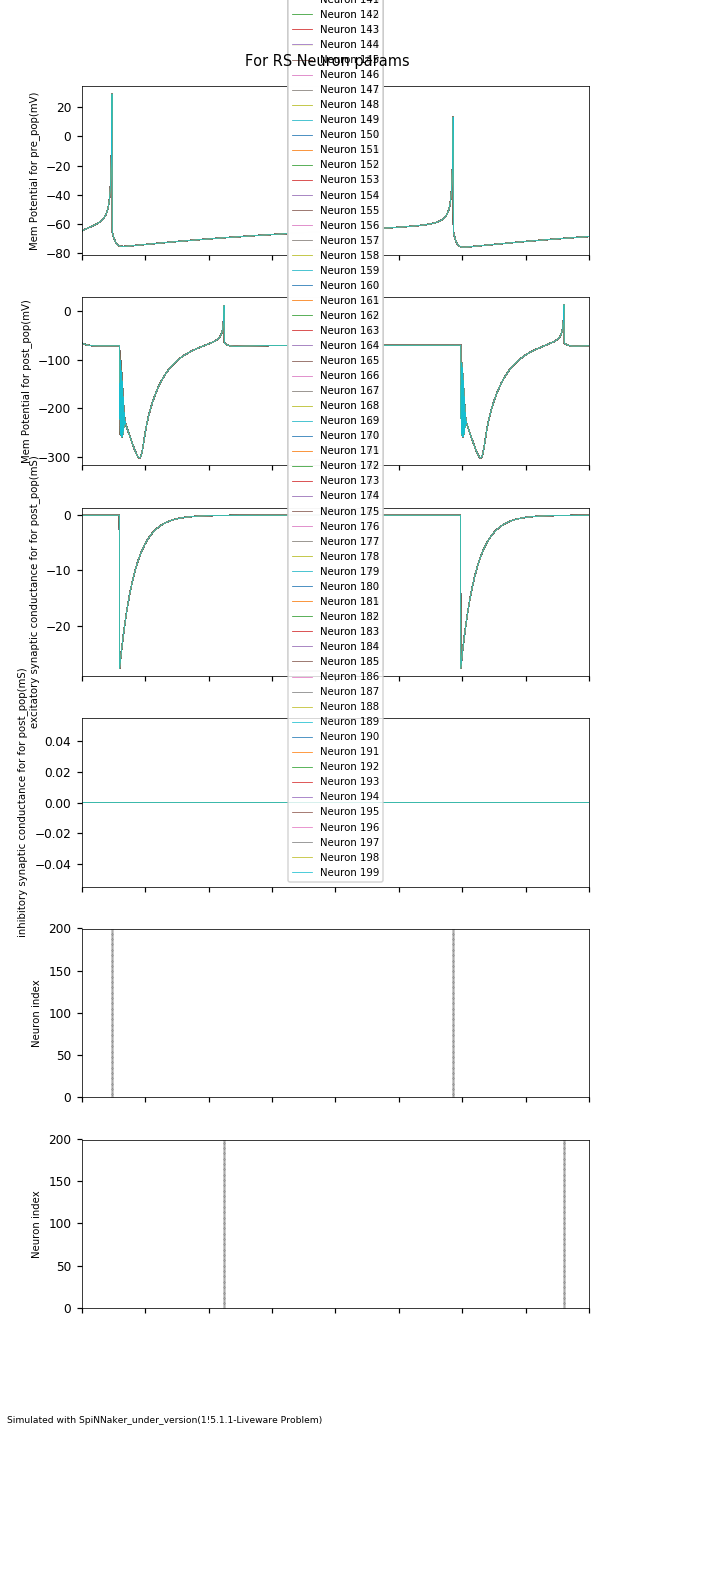

In [3]:
#spynnaker setup
sim.setup(timestep=0.1)

model = sim.extra_models.Izhikevich_cond


snr_a=0.02 #0.005 #0.1
snr_b=0.2 #0.32
snr_c=-65 #-65
snr_d=8 #2
snr_v_init = -65 #-70
snr_u_init = snr_b * snr_v_init

tau_ampa = 6###excitatory synapse time constant
tau_gabaa= 4### inhibitory synapse time constant
E_ampa = 0.0
E_gabaa = -80.0
current_bias = 4##50##100##4.0
cell_params_input = {'a': snr_a, 'b': snr_b, 'c': snr_c, 'd': snr_d,
                   'v': snr_v_init, 'u': snr_u_init,
                   'tau_syn_E': tau_ampa, 'tau_syn_I': tau_gabaa,
                   'i_offset': current_bias,
                   'e_rev_E': E_ampa, 'e_rev_I': E_gabaa,
                   }

cell_params_output = {'a': snr_a, 'b': snr_b, 'c': snr_c, 'd': snr_d,
                   'v': snr_v_init, 'u': snr_u_init,
                   'tau_syn_E': tau_ampa, 'tau_syn_I': tau_gabaa,
                   'i_offset': 0.0,
                   'e_rev_E': E_ampa, 'e_rev_I': E_gabaa,
                   }

pre_size = 200
post_size = 200

simtime = 200

pre_pop = sim.Population(pre_size, model(**cell_params_input))
post_pop = sim.Population(post_size, model(**cell_params_output))


wiring = sim.FixedProbabilityConnector(p_connect=1) ##  sim.AllToAllConnector() ##
static_synapse = sim.StaticSynapse(weight=.5, delay=3.0)
connections = sim.Projection(pre_pop, post_pop, wiring, static_synapse,
                             receptor_type='excitatory')

#record data
pre_pop.record(['v', 'spikes', 'gsyn_exc', 'gsyn_inh'])
post_pop.record(['v', 'spikes', 'gsyn_exc', 'gsyn_inh'])

#start simulation
sim.run(simtime)

#get data in neo format
neo_pre_spikes = pre_pop.get_data(variables = ['spikes','v', 'gsyn_exc', 'gsyn_inh'])
neo_post_spikes = post_pop.get_data(variables = ['spikes','v', 'gsyn_exc', 'gsyn_inh'])

#spiketrains
pre_pop_spikes = neo_pre_spikes.segments[0].spiketrains
post_pop_spikes = neo_post_spikes.segments[0].spiketrains

#membrane potential
pre_pop_v = neo_pre_spikes.segments[0].filter(name='v')
post_pop_v = neo_post_spikes.segments[0].filter(name='v')

#conductance excitatory
# pre_pop_gsyne = neo_pre_spikes.segments[0].filter(name='gsyn_exc')[0]
post_pop_gsyne = neo_post_spikes.segments[0].filter(name='gsyn_exc')

#conductance inhibitory
# pre_pop_gsyni = neo_pre_spikes.segments[0].filter(name='gsyn_inh')[0]
post_pop_gsyni = neo_post_spikes.segments[0].filter(name='gsyn_inh')

#end simulation
sim.end()

# Plot
plot.Figure(
    # plot voltage(pre_pop) for first ([0]) neuron
    plot.Panel(pre_pop_v[0], ylabel="Mem Potential for pre_pop(mV)",
               yticks=True, markersize=0.2, xlim=(0, simtime)),
    
    
    # plot voltage(post_pop) for first ([0]) neuron
    plot.Panel(post_pop_v[0], ylabel="Mem Potential for post_pop(mV)",
              yticks=True, markersize=0.2, xlim=(0, simtime)),
    # plot gsyn(post_pop) for first ([0]) neuron
    plot.Panel(post_pop_gsyne[0], ylabel="excitatory synaptic conductance for for post_pop(mS)",
              yticks=True, markersize=0.2, xlim=(0, simtime)),
        plot.Panel(post_pop_gsyni[0], ylabel="inhibitory synaptic conductance for for post_pop(mS)",
              yticks=True, markersize=0.2, xlim=(0, simtime)),
    
    # plot spikes(pre_pop) (or in this case spike)
    plot.Panel(pre_pop_spikes, yticks=True, markersize=0.2, xlim=(0, simtime)),
    # plot spikes(post_pop) (or in this case spike)
    plot.Panel(post_pop_spikes, yticks=True, markersize=0.2, xlim=(0, simtime)),
    title="For RS Neuron params",
    annotations="Simulated with {}".format(sim.name())).save('Finalnetwork_staticsynapse0.5_input100.png')
plt.show()
